In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
df['oldpeak']

,oldpeak
0,1.0
1,3.1
2,2.6
3,0.0
4,1.9
...,...
1020,0.0
1021,2.8
1022,1.0
1023,0.0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df["oldpeak"] = df["oldpeak"].astype(int)


In [ ]:
df['oldpeak']

,oldpeak
0,1
1,3
2,2
3,0
4,1
...,...
1020,0
1021,2
1022,1
1023,0


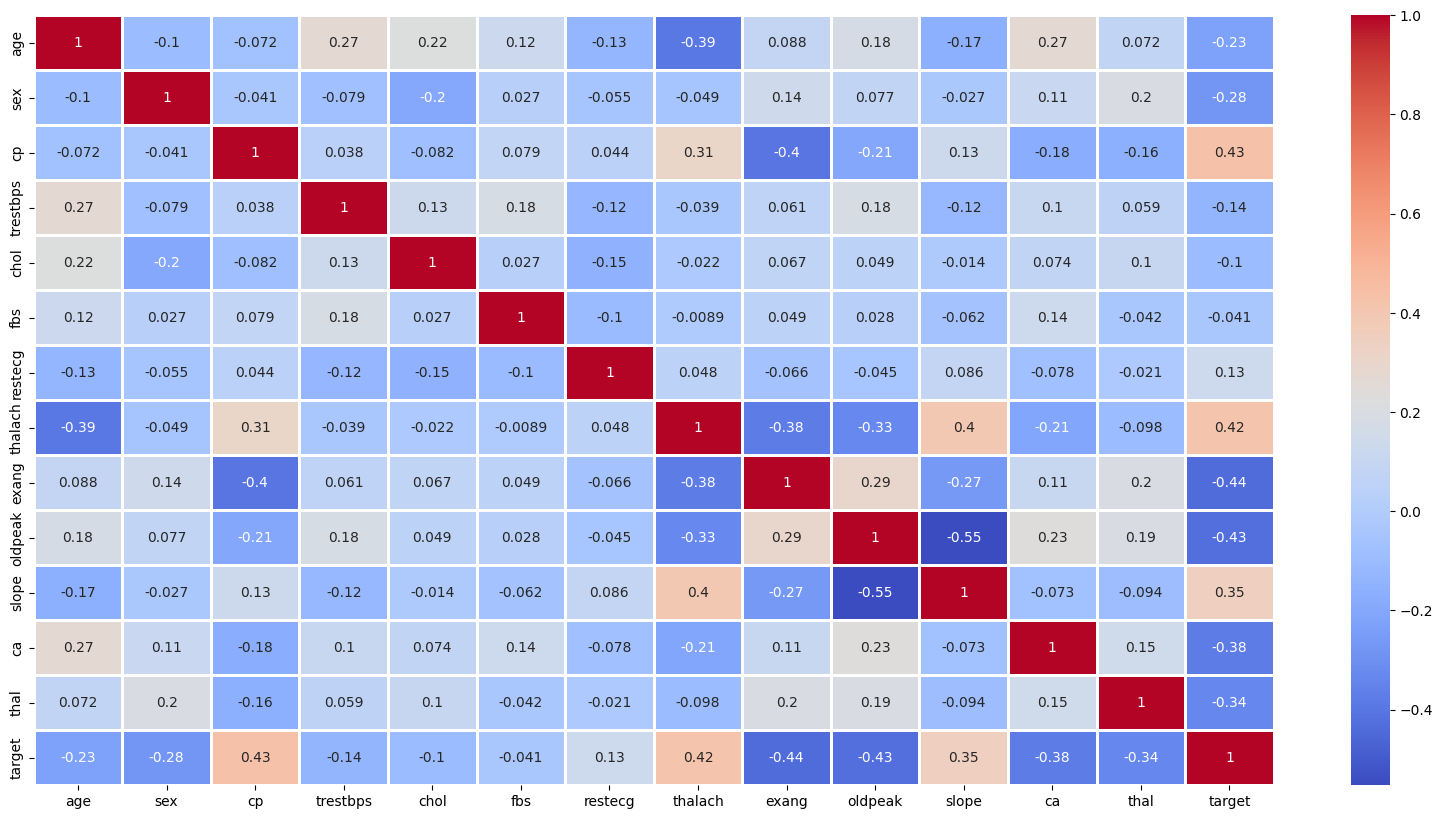

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm', linewidths=2)
plt.show()

#Check for Imbalance


Class distribution:
age
58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64
Class distribution ratio:
age
58    0.066341
57    0.055610
54    0.051707
59    0.044878
52    0.041951
51    0.038049
56    0.038049
62    0.036098
60    0.036098
44    0.035122
64    0.033171
41    0.031220
63    0.031220
67    0.030244
61    0.030244
55    0.029268
65    0.026341
43    0.025366
42    0.025366
53    0.025366
66    0.024390
45    0.024390
48    0.022439
46    0.022439
50    0.020488
47    0.017561
49    0.016585
35    0.014634
39    0.013659
70    0.013659
68    0.011707
38    0.011707
71    0.010732
40    0.010732
69    0.008780
37    0.005854
34    0.005

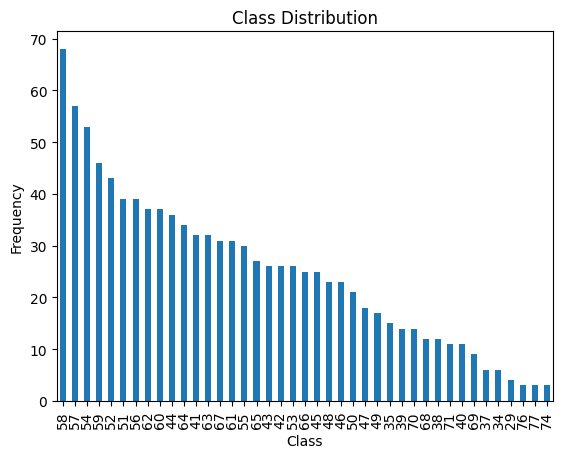

In [ ]:
target_column = 'age'

class_counts = df[target_column].value_counts()
print("Class distribution:")
print(class_counts)

class_ratio = class_counts / len(df)
print("Class distribution ratio:")
print(class_ratio)

class_counts.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#Feature Engineering

In [ ]:
X = df.drop('target', axis = 1)
Y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

<Axes: >

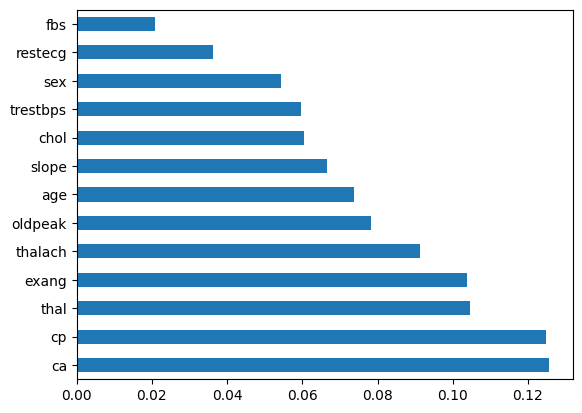

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,Y)

feat_importance = pd.Series(model.feature_importances_, index = X.columns)
feat_importance.nlargest(13).plot(kind = 'barh')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=0)
X_train, Y_train = sampler.fit_resample(X_train, Y_train)

#Model


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
# model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.metrics import classification_report
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95        98
           1       0.92      0.99      0.95       107

    accuracy                           0.95       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)
# model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.metrics import classification_report
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        98
           1       0.85      0.97      0.90       107

    accuracy                           0.89       205
   macro avg       0.90      0.89      0.89       205
weighted avg       0.90      0.89      0.89       205



##AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train,Y_train)

AdaBoostClassifier()

In [ ]:
from sklearn.metrics import classification_report
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        98
           1       0.89      0.93      0.91       107

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86        98
           1       0.87      0.88      0.87       107

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



#PCA

###Cari n_component

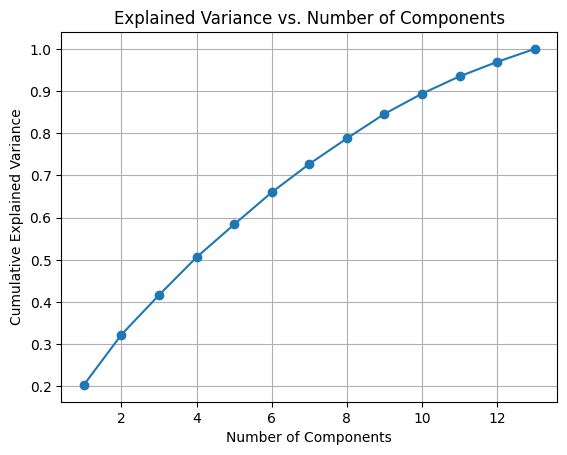

In [ ]:
#Perbandingan cumulative variance & komponen
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

explained_variances = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variances) + 1), explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()
#n_component diambil sesuai elbownya, atau sesuai variance yang diinginkan, misal klo komponen 12 dapet variance 100%, intinya ambil n_component sekecil mungkin tapi variancenya yang paling banyak

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 13)
#antara 12-13 sih yang bagus, emang atributnya dikit soalnya
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

##Random Forest

In [ ]:
model2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model2.fit(X_train_pca, Y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
print(X_train_pca.shape)
print(Y_train.shape)


(838, 13)
(838,)


In [ ]:
from sklearn.metrics import classification_report
Y_pred = model2.predict(X_test_pca)
print(classification_report(Y_test, Y_pred))
#random forestnya jelek klo pake pca ternyata, harusnya ga kehilangan fitur penting soalnya masih tetep pake 13
#kemungkinan karena pas di pca.fit_transform pengubahan dimensionalnya terlalu berlebihan jadi ilangin informasi penting

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        98
           1       0.95      1.00      0.97       107

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(max_depth=5, random_state=42)
model2.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.metrics import classification_report
Y_pred = model2.predict(X_test_pca)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        98
           1       0.96      0.83      0.89       107

    accuracy                           0.89       205
   macro avg       0.90      0.90      0.89       205
weighted avg       0.90      0.89      0.89       205



##AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model2 = AdaBoostClassifier()
model2.fit(X_train_pca, Y_train)

AdaBoostClassifier()

In [ ]:
from sklearn.metrics import classification_report
Y_pred = model2.predict(X_test_pca)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.97      0.95      0.96       107

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()
model2.fit(X_train_pca, Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report
Y_pred = model2.predict(X_test_pca)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86        98
           1       0.87      0.88      0.87       107

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



#GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



##Random Forest

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [ ]:
print("Best Score:", clf.best_score_)
print("Best Parameters:", clf.best_params_)

Best Score: 0.8828571428571429
Best Parameters: {'max_depth': 13, 'max_features': 3}


##KNN

In [ ]:
knn_params = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
##evaluasi segala kemungkinan parameter buat cari yang terbaik
##jadi dia evaluasi 15rb an kemungkinan dari si knn_params
clf2 = GridSearchCV(knn, knn_params, cv=10, scoring='accuracy')

In [ ]:
clf2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
#best score disini tuh sbenernya best score dari si gridsearchCVnya, tapi bisa diartiin juga sebagai rata2 accuracy yang memungkinkan dari kombinasi parameter2 tadi
print("Best Score:", clf2.best_score_)
##print parameter terbaik dari hasil evaluasi tadi
print("Best Parameters:", clf2.best_params_)

Best Score: 0.9853658536585366
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


##Decision Trees

In [ ]:

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(1, 21)),  #makin dalem makin bagus sebenernya, tapi makin rawan overfit
    'min_samples_split': list(range(2, 21)), #value tinggi mencegah overfit
    'min_samples_leaf': list(range(1, 21))   #value yg lebih besar bisa bantu smooth model
}

dt = DecisionTreeClassifier()

clf_dt = GridSearchCV(dt, dt_params, cv=10, scoring='accuracy')
clf_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                       12, 13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20]},
             scoring='accuracy')

In [ ]:
print("Best Score:", clf_dt.best_score_)
print("Best Parameters:", clf_dt.best_params_)

Best Score: 0.9926829268292682
Best Parameters: {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [ ]:
adaboost_params = {
    'n_estimators': list(range(50, 201, 50)),
    'learning_rate': [0.01, 0.1, 1.0, 10.0]
}
adaboost = AdaBoostClassifier()

clf_ada = GridSearchCV(adaboost, adaboost_params, cv=10, scoring='accuracy')
clf_ada.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0, 10.0],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
print("Best Score:", clf_ada.best_score_)
print("Best Parameters:", clf_ada.best_params_)

Best Score: 0.9426829268292682
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the pipeline
pipeline = Pipeline([
    ('pca', PCA()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define the parameter grid
param_grid = {
    'pca__n_components': [5, 10, 13],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 15],
    'clf__max_features': [5, 10, 'auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_pca, Y_train)

# Output the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/pyth

Best parameters found:  {'clf__max_depth': 10, 'clf__max_features': 5, 'clf__n_estimators': 100, 'pca__n_components': 10}
Best cross-validation score:  0.9904475043029259
